In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [58]:
# wygenerowanie danych
rng = np.random.RandomState(42)
x_train = 0.3 * rng.randn(100, 2) # 100 obserwacji, każda obserwacja złożona z dwóch liczb
x_test = 0.3 * rng.randn(20, 2)
x_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [59]:
print(x_train[1:5])
print(x_test[1:5])
print(x_outliers[1:5])

[[ 0.19430656  0.45690896]
 [-0.07024601 -0.07024109]
 [ 0.47376384  0.23023042]
 [-0.14084232  0.16276801]]
[[ 0.32491537  0.31614062]
 [-0.41330081 -0.28134751]
 [ 0.15451058  0.15413579]
 [ 0.15451431  1.15581945]]
[[-3.79719405  3.70118732]
 [ 2.68784096  1.56779365]
 [-0.72837644 -2.61364544]
 [-2.74850366 -1.99805681]]


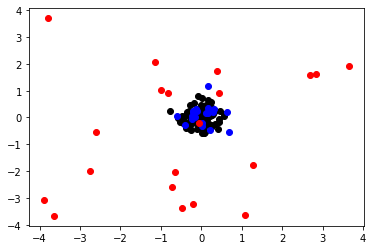

In [60]:
plt.scatter(x_train[:,0], x_train[:,1], color='black')
plt.scatter(x_test[:,0], x_test[:,1], color='blue')
plt.scatter(x_outliers[:,0], x_outliers[:,1], color='red')
plt.show()

In [61]:
#wytrenowanie model
clf = IsolationForest(n_estimators=100, random_state=42, contamination=0.001)
clf.fit(x_train)

IsolationForest(contamination=0.001, random_state=42)

In [62]:
# przewidywanie
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
y_pred_outliers = clf.predict(x_outliers)

In [63]:
print(y_pred_train)
print(y_pred_test)
print(y_pred_outliers)
#co oznacza -1, a co 1?

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1]


In [64]:
# liczba poprawnych i niepoprawnych predykcji
print("Train dataset:")
print(" 1: " + str(np.count_nonzero(y_pred_train == 1)))
print("-1: " + str(np.count_nonzero(y_pred_train == -1)))
print("Test dataset:")
print(" 1: " + str(np.count_nonzero(y_pred_test == 1)))
print("-1: " + str(np.count_nonzero(y_pred_test == -1)))
print("Outliers dataset:")
print(" 1: " + str(np.count_nonzero(y_pred_outliers == 1)))
print("-1: " + str(np.count_nonzero(y_pred_outliers == -1)))

Train dataset:
 1: 99
-1: 1
Test dataset:
 1: 20
-1: 0
Outliers dataset:
 1: 5
-1: 15


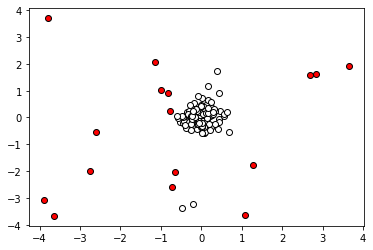

In [65]:
# funkcja ravel() spłaszcza dane
plt.scatter(x_train[(np.where(y_pred_train==1)[0]).ravel(),0], 
            x_train[(np.where(y_pred_train==1)[0]).ravel(),1], 
            c='white', edgecolor='black')
plt.scatter(x_train[(np.where(y_pred_train==-1)[0]).ravel(),0], 
            x_train[(np.where(y_pred_train==-1)[0]).ravel(),1], 
            c='red', edgecolor='black')
plt.scatter(x_test[(np.where(y_pred_test==1)[0]).ravel(),0], 
            x_test[(np.where(y_pred_test==1)[0]).ravel(),1], 
            c='white', edgecolor='black')
plt.scatter(x_test[(np.where(y_pred_test==-1)[0]).ravel(),0], 
            x_test[(np.where(y_pred_test==-1)[0]).ravel(),1], 
            c='red', edgecolor='black')
plt.scatter(x_outliers[(np.where(y_pred_outliers==1)[0]).ravel(),0], 
            x_outliers[(np.where(y_pred_outliers==1)[0]).ravel(),1], 
            c='white', edgecolor='black')
plt.scatter(x_outliers[(np.where(y_pred_outliers==-1)[0]).ravel(),0], 
            x_outliers[(np.where(y_pred_outliers==-1)[0]).ravel(),1], 
            c='red', edgecolor='black')
plt.show()

In [10]:
# Zadania
# 1. Prosze sprawdzic jak liczba drzew w lesie wplywa na wyniki dla sztucznie wygenerowanych danych
# 2. Prosze przetestować metode isolation forest na zbiorze danych z dwoma skupiskami punktow